## 11. Anexos

#### Análisis y Visualización de Datos con Python

Este código importa bibliotecas esenciales de Python para trabajar con datos. `pandas` se utiliza para manipular y analizar datos estructurados, `numpy` proporciona herramientas para cálculos numéricos, `seaborn` simplifica la creación de gráficos estadísticos atractivos y `matplotlib` permite personalizar visualizaciones de datos. Esta combinación de bibliotecas es fundamental para explorar, comprender y comunicar información a partir de conjuntos de datos.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Categorización de Datos

Estas funciones en Python transforman valores numéricos (edad, horas, meses) en categorías discretas. Esto es útil para agrupar datos y facilitar el análisis, especialmente en áreas como demografía (categorías de edad) o análisis de comportamiento (categorías de horas trabajadas). Las categorías detalladas de edad podrían ser relevantes para estudios específicos que requieran mayor precisión en ciertos rangos de edad.

**Glosario:**

* **V (25-44 años):** Voluntarios Académicos
* **MI (14-24 años):** Mentores Inversos
* **LI (20-34 años):** Lab Innovación
* **PC:** Participantes de CircleUp

In [17]:
def age_category(edad):
    if edad < 18:
        return '0-17'
    elif edad < 25:
        return '18-24'
    elif edad < 35:
        return '25-34'
    elif edad < 45:
        return '35-44'
    elif edad < 55:
        return '45-54'
    elif edad < 65:
        return '55-64'
    else:
        return '65+'
    

def age_overall(edad):
    if edad < 15:
        return '0-14'
    elif edad < 60:
        return '15-59'
    else:
        return '60+'
    
def hour_category(hours):
    if hours < 18:
        return '0-17'
    elif hours < 35:
        return '18-34'
    elif hours < 45:
        return '35-44'
    elif hours < 55:
        return '45-54'
    else:
        return '55+'
    
def month_category(months):
    if months < 4:
        return '0-3'
    elif months < 7:
        return '4-6'
    elif months < 10:
        return '7-9'
    elif months < 13:
        return '10-12'
    else:
        return '12+'



def age_category_detailed(edad):
    if edad <= 13:
        return '0-13'
    elif edad <= 17:
        return '14-17'
    elif edad <= 19:
        return '18-19'
    elif edad <= 24:
        return '20-24'
    elif edad <= 29:
        return '25-29'
    elif edad <= 34:
        return '30-34'
    elif edad <= 39:
        return '35-39'
    elif edad <= 44:
        return '40-44'
    elif edad <= 49:
        return '45-49'
    elif edad <= 54:
        return '50-54'
    elif edad <= 59:
        return '55-59'
    elif edad <= 64:
        return '60-64'
    elif edad <= 69:
        return '65-69'
    elif edad <= 74:
        return '70-74'
    else:
        return '75+'


#### Formato Visual de Categorías

Estas funciones se utilizan para dar formato visual a las categorías de datos. La función `format_category` aplica estilos CSS específicos a las categorías 'MI', 'PC', 'LI' y 'VA' para resaltarlas visualmente. La función `age_format` asigna estas categorías a los rangos de edad correspondientes y devuelve una cadena de texto con el rango de edad y las categorías formateadas, listas para ser mostradas en una interfaz web o aplicación.


In [18]:
def format_category(category):
    formats = {
        'MI': f'<span class="mi">({category})</span>',
        'PC': f'<span class="pc">({category})</span>',      
        'LI': f'<span class="li">({category})</span>',     
        'VA': f'<span class="va">({category})</span>'          
    }
    return formats[category]

def age_format(rango):
    categories = {
        '0-13': ['PC'],
        '14-17': ['MI', 'PC'],
        '18-19': ['MI', 'PC'],
        '20-24': ['MI', 'LI', 'PC'],
        '25-29': ['VA', 'LI', 'PC'],
        '30-34': ['VA', 'LI', 'PC'],
        '35-39': ['VA', 'PC'],
        '40-44': ['VA', 'PC'],
        '45-49': ['PC'],
        '50-54': ['PC'],
        '55-59': ['PC'],
        '60-64': ['PC'],
        '65-69': ['PC'],
        '70-74': ['PC'],
        '75+': ['PC']
    }
    
    cats = categories[rango]
    formatted_cats = ' '.join(format_category(cat) for cat in cats)
    
    return f"{rango} {formatted_cats}"

#### Carga y Filtrado de Microdatos del DANE

Este código carga datos socioeconómicos del DANE (Departamento Administrativo Nacional de Estadística de Colombia) desde archivos CSV. La función `load_data` permite seleccionar un capítulo específico de los microdatos y filtrar los datos para incluir solo información correspondiente al municipio de Tocancipá (código 25817). Adicionalmente, la función puede renombrar las columnas del conjunto de datos utilizando un diccionario de características (`dfeatures`) para facilitar la interpretación y análisis de los datos.

In [19]:
adata = pd.read_csv('./Datos/DANE/Microdatos EM, (2021)/(Capítulo A).csv', 
                    encoding='utf-8', 
                    encoding_errors='replace', 
                    sep=';',low_memory=False)

dirs = adata[adata['MPIO'] == 25817]['DIRECTORIO'].values
DIRECTORIO = dirs.astype(np.int32)

def load_data(chapter,dfeatures=None):
  """
  DIRECTORIO: Identificador numérico de vivienda Tocancipa
  """
  data = pd.read_csv(f'./Datos/DANE/Microdatos EM, (2021)/(Capítulo {chapter}).csv', 
                    encoding='utf-8', 
                    encoding_errors='replace', 
                    sep=';',low_memory=False)
  data = data[data['DIRECTORIO'].isin(DIRECTORIO)]
  if dfeatures:
    long_columns = list(dfeatures[chapter].values())
    data.columns = long_columns
    return data
  else:
    return data

#### Extracción de Metadatos

Este código extrae información relevante del archivo XML de metadatos de la Encuesta de Micronegocios del DANE (DANE-DIMPE-EM-2021.xml).  

**Funcionalidades:**

1. **Organización de la Estructura de Datos:** Crea diccionarios que relacionan capítulos de la encuesta con los archivos de datos correspondientes (`data_explorer`), y almacenan metadatos sobre las variables (nombres de variables y preguntas asociadas) para cada capítulo (`dfeatures`).

2. **Mapeo de Respuestas:** La función `answers_mapping` permite obtener el mapeo entre los valores numéricos de las respuestas y las etiquetas de texto correspondientes para una pregunta específica en un capítulo determinado.

3. **Identificación de Valores Nulos y Preguntas Relevantes:** Las funciones `bad_nulls` y `good_qstn` ayudan a identificar variables con alta o baja cantidad de valores nulos y a extraer las preguntas asociadas a las variables con pocos valores nulos. Esta información puede ser útil para comprender la calidad de los datos y para seleccionar variables relevantes para el análisis.

In [20]:
import xml.etree.ElementTree as ET

tree = ET.parse('./Datos/DANE/Microdatos EM, (2021)/DANE-DIMPE-EM-2021.xml')
root = tree.getroot()

namespace = {'d': 'http://www.icpsr.umich.edu/DDI'}

groups = [data.get('ID') for data in root.findall('d:dataDscr/d:varGrp', namespace)]
files = [data.get('ID') for data in root.findall('d:fileDscr', namespace)]
chapters = ['A','B','C','D','E','F','G','H','I','J','K','L','M1','M2']
data_explorer = dict(zip(chapters,files))

dfeatures = {}

def get_qstn(parent, subelem_name, default=None, namespaces=None):
    if namespaces:
        subelem = parent.find(subelem_name, namespaces)
    else:
        subelem = parent.find(subelem_name)
    try:
        return subelem.text.strip() if subelem is not None else default
    except:
        return subelem.text if subelem is not None else default

for idx,file in data_explorer.items():
    metadata = {}
    vars_file = root.findall(f'.//d:var[@files="{file}"]', namespace)
    for var in vars_file:
        name = var.get('name')
        qstn = get_qstn(var, 'd:qstn/d:qstnLit', namespaces=namespace)
        catgry = get_qstn(var, 'd:catgry/d:qstnLit', namespaces=namespace)
        metadata[name] = qstn
    dfeatures[idx] = metadata

def answers_mapping(chapter,question): 
    mapping_answer = {}
    files = data_explorer[chapter]
    vars_file = root.findall(f'.//d:var[@files="{files}"]', namespace)
    vars_file = [var for var in vars_file if var.get('name') == question]
    answer_types = vars_file[0].findall('.//d:catgry', namespace)
    for catgry in answer_types:
        key = int(get_qstn(catgry, 'd:catValu', namespaces=namespace))
        value = get_qstn(catgry, 'd:labl', namespaces=namespace)
        mapping_answer[key] = value
    return mapping_answer


def bad_nulls(chapter,bads,goods):
    data = load_data(chapter)
    cols = data.isnull().sum().sort_values(ascending=False).to_frame(name='nulls').reset_index()
    bad = cols[cols['nulls'] >= bads]['index'].values
    god = cols[cols['nulls'] <= goods]['index'].values
    return (bad,god)

import re

def good_qstn(chapter,bads,goods):
    pattern = r'(.*)\n'
    good = bad_nulls(chapter,bads,goods)[1]
    for idx, qstn in enumerate(good):
        match = re.search(pattern, dfeatures[chapter][qstn])
        if match:
            question = match.group(1)
            print(f'#{idx}({qstn}) | {question}')

#### Unificación y Procesamiento de Datos

Este código unifica y procesa los datos de múltiples capítulos de la Encuesta de Micronegocios del DANE.

**Funcionalidades Principales:**

1. **Mapeo de Respuestas:** La función `map_dataframe` convierte las respuestas numéricas de los datos en etiquetas de texto descriptivas utilizando el mapeo obtenido del archivo XML de metadatos.

2. **Unificación de Datos por Capítulo:** La función `unified_data` combina los datos demográficos (Capítulo E) con los datos de un capítulo específico, asegurando que solo se incluyan los registros que tienen información en ambos capítulos. También realiza el mapeo de respuestas para el capítulo seleccionado.

3. **Unificación de Múltiples Capítulos:** La función `unified` unifica los datos de varios capítulos seleccionados ('E', 'H', 'J', 'I', 'K', 'F'). Agrega categorías de edad ('AGE_RANGE', 'AGE_DETAIL') basadas en la variable 'NPCEP4' del capítulo E. También formatea las categorías de edad para su visualización ('AGE_FORMAT'). Además, la función `multiple_merge` permite combinar los datos de los capítulos seleccionados mientras evita conflictos de nombres de columnas.

4. **Manejo de Valores Nulos:** Aunque el código tiene comentarios que indican la posibilidad de eliminar columnas con muchos valores nulos, esta funcionalidad no está activa en la versión actual.


In [21]:
from functools import reduce

def map_dataframe(dataframe:pd.DataFrame,chapter):

  for feature in dataframe.columns:
    try:
      mapped = answers_mapping(chapter,feature)
      if mapped:
        dataframe[feature] = dataframe[feature].map(mapped)
    except:
      pass
  return dataframe


def unified_data(chapter):

  nulls_allowed = 1000

  demo_data = load_data('E')
  demo_data['AGE_RANGE'] = demo_data['NPCEP4'].apply(age_category)
  demo_data['AGE_DETAIL'] = demo_data['NPCEP4'].apply(age_category_detailed)
  # demo_bad = list(bad_nulls('E',nulls_allowed,nulls_allowed)[0])
  # demo_data.drop(demo_bad,axis='columns',inplace=True)
  demo_data = map_dataframe(demo_data,'E')
  

  chapter_data = load_data(chapter)
  # chapter_bad = list(bad_nulls(chapter,nulls_allowed,nulls_allowed)[0])
  # chapter_data.drop(chapter_bad,axis='columns',inplace=True)
  chapter_data = map_dataframe(chapter_data,chapter)

  join_params = ['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'SECUENCIA_P','ORDEN']
  dataset = demo_data.merge(chapter_data,how='inner',on=join_params)

  return dataset

def multiple_merge(dfs, on, how='inner'):
    def merge_with_rename(left, right):
        # Identificar columnas comunes que no son parte de 'on'
        common_cols = set(left.columns) & set(right.columns) - set(on)
        
        # Renombrar columnas comunes en el DataFrame de la derecha
        rename_dict = {col: f"{col}_{right.name}" for col in common_cols}
        right_renamed = right.rename(columns=rename_dict)
        
        # Realizar el merge
        merged = pd.merge(left, right_renamed, on=on, how=how)
        return merged

    # Asignar nombres a los DataFrames si no los tienen
    for i, df in enumerate(dfs):
        if not hasattr(df, 'name') or df.name is None:
            df.name = f'df_{i}'

    return reduce(merge_with_rename, dfs)

def unified():
    join_params = ['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'SECUENCIA_P', 'ORDEN']
    chapters = ['E', 'H', 'J', 'I', 'K', 'F']
    datasets = []

    for chapter in chapters:
        data = load_data(chapter)
        data = map_dataframe(data, chapter)
        if chapter == 'E':
            data['AGE_RANGE'] = data['NPCEP4'].apply(age_category)
            data['AGE_DETAIL'] = data['NPCEP4'].apply(age_category_detailed)
            data['AGE_OVERALL'] = data['NPCEP4'].apply(age_overall)
            data['AGE_FORMAT'] = data['NPCEP4'].apply(lambda x : age_format(age_category_detailed(x)))
        # if chapter == 'K':
        #    data['MONTH_RANGE'] = data['NPCKP20A'].apply(month_category)
        # # Asignar un nombre al DataFrame basado en el capítulo
        data.name = f'chapter_{chapter}'
        datasets.append(data)

    big_data = multiple_merge(datasets, on=join_params)
    
    big_data.columns = [col.split('_chapter')[0] if '_chapter' in col else col for col in big_data.columns]
    
    return big_data

#### Estimación Poblacional

Estas funciones en Python estiman características de la población de Tocancipá (Colombia) a partir de una muestra de la Encuesta de Micronegocios del DANE de 2021. Asumen una población de 39,416 en 2018 y un tamaño de muestra de 2,015.

**Funcionalidades:**

* **`pop_estimate_raw(value)`:** Calcula y muestra la proporción estimada, el valor estimado en la población, el intervalo de confianza del 95% y el error estándar relativo. Incluye una explicación y una advertencia sobre la posible subestimación debido al crecimiento poblacional.

* **`pop_estimate(value)`:** Retorna el intervalo de confianza y el error estándar relativo en un formato más compacto.

* **`pop_estimate_range(value)`:** Similar a `pop_estimate`, pero presenta el intervalo de confianza en un formato legible "Est. [límite inferior] a [límite superior] Pers.".

* **`pop(value)`:** Simplifica aún más el formato de salida, retornando solo el intervalo de confianza estimado "(límite inferior-límite superior)". Si el valor de entrada es 0, retorna "(0-0)".

**Consideraciones Importantes:**

* **Subestimación:** Las estimaciones pueden ser inferiores a los valores reales debido al crecimiento poblacional de Tocancipá desde 2018.
* **Margen de Error:** Los intervalos de confianza indican la incertidumbre asociada a las estimaciones. Un intervalo más amplio indica mayor incertidumbre.
* **Error Estándar Relativo:** Mide la precisión de la estimación en relación con su magnitud. Un valor más bajo indica mayor precisión.

In [22]:
import numpy as np
from scipy import stats

def pop_estimate_raw(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."
    
    # Calcular la proporción en la muestra
    sample_proportion = value / total_sample_2021
    
    # Calcular el error estándar
    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)
    
    # Calcular el intervalo de confianza del 95%
    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    # Extrapolar a la población total
    estimated_population_value = round(sample_proportion * total_population_2018)
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    # Calcular el error estándar relativo
    relative_standard_error = (standard_error / sample_proportion) * 100
    
    return f"""
    Estimated proportion: {sample_proportion*100:.2f}%,
    Estimated population value: {estimated_population_value},
    95% Confidence Interval: {estimated_population_interval},
    Relative Standard Error (%)": {relative_standard_error:.2f}%
    """
    # Explanation:
    # La proporción estimada representa la fracción de la población que se estima posee 
    # la característica de interés. Se calcula dividiendo el valor observado en la muestra 
    # entre el tamaño total de la muestra.
    
    # Disclaimer:
    # Estas estimaciones están basadas en datos del censo de 2018 y 
    # una muestra de 2021. Debido al rápido crecimiento poblacional de Tocancipá, es probable 
    # que estas estimaciones subestimen los valores actuales. Los usuarios deben considerar 
    # un margen de error adicional al interpretar estos resultados. Se recomienda utilizar 
    # estas estimaciones como una referencia general y no como valores precisos para la 
    # población actual de Tocancipá.
    # """

def pop_estimate(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."

    sample_proportion = value / total_sample_2021

    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)
  
    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    relative_standard_error = (standard_error / sample_proportion) * 100
    return f'{estimated_population_interval} | {relative_standard_error:.2f}%'


def pop_estimate_range(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."

    sample_proportion = value / total_sample_2021

    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)

    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    relative_standard_error = (standard_error / sample_proportion) * 100
    return f'Est. {estimated_population_interval[0]:,} a {estimated_population_interval[1]:,} Pers.'


def pop(value):
    if value != 0:
        total_population_2018 = 39416
        total_sample_2021 = 2015
        if value > total_sample_2021:
            return "Error: El valor está fuera de rango."

        sample_proportion = value / total_sample_2021
        

        standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)

        confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
        
        estimated_population_interval = (
            round(confidence_interval[0] * total_population_2018),
            round(confidence_interval[1] * total_population_2018)
        )
        
        relative_standard_error = (standard_error / sample_proportion) * 100
        return f'({estimated_population_interval[0]:,}-{estimated_population_interval[1]:,})'
    
    else:
        return f'({value}-{value})' 

#### Desagregación y Análisis de Datos

Esta función `unstack_data` procesa datos de la Encuesta de Micronegocios del DANE para un capítulo y un conjunto de preguntas específicas.

**Funcionalidades:**

1. **Carga y Preprocesamiento:** Carga datos del capítulo, crea categorías de edad y mes si las variables 'NPCEP4' y 'NPCKP20A' están presentes, y mapea respuestas numéricas a etiquetas de texto.

2. **Filtrado:** Elimina filas con valores nulos en las preguntas de interés y selecciona las 15 categorías más frecuentes de la primera pregunta para un análisis más enfocado.

3. **Tabla Dinámica:** Crea una tabla dinámica (pivot table) que cuenta las ocurrencias de cada combinación de respuestas a las dos primeras preguntas.

4. **Transformación y Enriquecimiento:** Desapila la tabla dinámica para obtener un formato más adecuado para visualización, agrega columnas con el porcentaje acumulado y el intervalo de confianza (IC 95%) y error estándar relativo.

In [23]:
def unstack_data(chapter,questions,question_names,idx_name=None,idx=None):
  data = load_data(chapter, dfeatures=None)

  categry_columns = {
                    'NPCEP4':['AGE_RANGE',age_category],
                    'NPCKP20A':['MONTH_RANGE',month_category]
                    }

  for cat_key,cat_name in categry_columns.items():

    if data.columns.__contains__(cat_key):
      data[cat_name[0]] = data[cat_key].apply(cat_name[1])
    
  data.dropna(inplace=True, subset=questions, how='any')

  for qstn in questions:
    if qstn not in ['AGE_RANGE','MONTH_RANGE','SALARY_RANGE']:
      try:
        data[qstn] = data[qstn].astype('int')
        data[qstn] = data[qstn].map(answers_mapping(chapter, qstn))
      except:
        print('Non Float Value')

  top_5 = data[questions[0]].value_counts().nlargest(15).index
  data_filtered = data[data[questions[0]].isin(top_5)]

  data_pivot = pd.pivot_table(data_filtered, values='DIRECTORIO', index=[questions[0]], columns=[questions[1]], 
                                aggfunc='count', fill_value=0)
  
  sample_name = f'Muestra ({(len(data)/2015)*100:.2f}%)'
  data_stacked = data_pivot.stack().reset_index()
  data_stacked.columns = question_names + [sample_name]
  data_stacked = data_stacked[data_stacked[sample_name] > 5]
  data_stacked = data_stacked.sort_values(by=[question_names[0], sample_name], ascending=[True, False])
  data_stacked = data_stacked.head(10)

  data_stacked.set_index(question_names, inplace=True)
  data_stacked[f'Acumulado'] = (data_stacked[sample_name].cumsum() * 100/len(data_filtered)).apply(lambda x:f'{x:.2f}%')
  data_stacked['IC 95% | % Standard Error'] = data_stacked[sample_name].apply(lambda x: pop_estimate(int(x)))
  if idx_name is not None:
    data_stacked.rename_axis(index={question_names[idx]: f'{idx_name}'}, inplace=True)
  
  return data_stacked

#### Visualización de Distribuciones

Esta función `plot_hist_hue` crea gráficos para analizar la distribución de una variable (`question`) en diferentes categorías de otra variable (`hue`), proporcionando estimaciones poblacionales para cada categoría.

**Funcionalidades:**

1. **Distribución por Categoría:** Genera histogramas (para variables numéricas) o diagramas de barras (para variables categóricas) para cada valor único de la variable `hue`.

2. **Etiquetado:**
   - Muestra el valor y el porcentaje de cada barra.
   - Resalta la barra más alta en cada categoría.
   - Incluye el nombre de la categoría (`hue_value`), el total de observaciones en esa categoría, el porcentaje respecto al total general y una estimación del rango poblacional.

3. **Formato y Diseño:**
   - Ajusta automáticamente el tamaño de la figura según el número de categorías.
   - Personaliza el tamaño y estilo de las fuentes, los ejes y la cuadrícula.
   - Maximiza el espacio utilizado en la figura.
   - Opcionalmente, guarda la figura en un archivo.

**Parámetros:**

- `data`: DataFrame de Pandas que contiene los datos.
- `hue`: Nombre de la variable categórica que define las categorías.
- `question`: Nombre de la variable a analizar.
- `name`: Etiqueta para el eje X.
- `hue_name`: Nombre descriptivo de la variable `hue`.
- `image_name` (opcional): Nombre del archivo para guardar la figura.


In [24]:
def plot_hist_hue(data, hue, question, name, hue_name,image_name=None):
    
    font_size = 10
    font_sub = 11
    font_title = 11
    
    df = data.dropna(subset=[question, hue])
    hue_values = df[hue].unique()
    cols = min(2, len(hue_values))
    rows = (len(hue_values) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(6.5*cols, 4*rows), squeeze=False)
    # fig.suptitle(f'Distribución Frec. | Total {len(df)} ({(len(df)*100/2015):.2f}%)\n{hue_name}', fontsize=font_title, fontweight='bold', y=0.95)
    
    for idx, hue_value in enumerate(hue_values):
        ax = axes[idx // cols, idx % cols]
        hue_data = df[df[hue] == hue_value]
        
        if pd.api.types.is_numeric_dtype(hue_data[question]):
            sns.histplot(data=hue_data, x=question, kde=True, ax=ax)
        else:
            sns.countplot(data=hue_data, x=question, ax=ax)
        
        total = len(hue_data)
        for p in ax.patches:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(f'{int(height)}\n({percentage})', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', xytext=(0, 5),
                        textcoords='offset points', fontsize=font_size)
        
        heights = [p.get_height() for p in ax.patches]
        ax.patches[heights.index(max(heights))].set_facecolor('lightblue')
        
        estimate = pop_estimate_range(int(total))
        
        ax.set_title(f'Responde ({hue_value})\nTotal {total} ({(total*100/len(df)):.2f}%) | {estimate}', fontsize=font_sub)
        ax.set_xlabel(name, fontsize=font_sub, fontweight='bold')
        ax.set_ylabel('Frecuencia', fontsize=font_sub, fontweight='bold')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        ymax = max(heights)
        ax.set_ylim(0, ymax * 1.20)

    for idx in range(len(hue_values), rows * cols):
        fig.delaxes(axes[idx // cols, idx % cols])

    plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=1, hspace=0.55, wspace=0.3)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    if image_name is not None:
        path = './circleup/figures'
        plt.savefig(f'{path}/{image_name}.png')

    plt.show()

In [25]:
datasets = unified()

#### Lista de Variables Sociodemográficas

Esta lista contiene nombres de variables relevantes para el análisis sociodemográfico y de salud, extraídas de la Encuesta de Micronegocios del DANE. Cada variable va acompañada de una breve descripción y su posible código en la encuesta (si está disponible).

**Demografía:**

* `SEXO`: Sexo del encuestado.
* `AGE_RANGE`: Rango de edad del encuestado (categorizado).
* `NPCEP4`: Edad del encuestado (numérica).
* `ESTADO CIVIL`: Estado civil del encuestado (`NPCEP7`).
* `DONDE NACIO`: Lugar de nacimiento del encuestado (`NPCEP11A`).
* `UBICACION HACE 5 ANOS`: Ubicación del encuestado hace 5 años (`NPCEP13`).
* `OTRO PAIS-PAIS HACE 5 ANOS`: País de residencia hace 5 años si era diferente a Colombia (`NPCEP13D`).

**Educación:**

* `EDUCACION NIVEL`: Nivel educativo alcanzado (`NPCHP4`).
* `ASISTENCIA ESCOLAR`: Asistencia actual a alguna institución educativa (`NPCHP2`).
* `ALFABETIZACION`: Nivel de alfabetización (`NPCHP1`).
* `EDU DISCRIMINACION APARIENCIA FISICA`: Discriminación en educación por apariencia física (`NPCHP35E`).
* `CONDICION SOCIAL`: Discriminación en educación por condición social (`NPCHP35I`).
* `EXTRANJERO`: Discriminación en educación por ser extranjero (`NPCHP35K`).

**Actividades Culturales:**

* `Deporte`: Participación en actividades deportivas (`NPCHP30B`).
* `Teatro, Danza, Música`: Participación en actividades artísticas (`NPCHP30C`).
* `Biblioteca`: Uso de bibliotecas (`NPCHP30E`).
* `Lectura`: Hábito de lectura (`NPCHP30G`).

**Trabajo:**

* `SITUACION LABORAL`: Situación laboral actual (`NPCKP1`).
* `TIPO LABOR`: Tipo de trabajo (`NPCKP17`).
* `TIPO CONTRATO`: Tipo de contrato laboral (`NPCKP20`).
* `MONTH_RANGE LABORADO`: Meses trabajados en el último año (categorizado).
* `MEDIO DE EMPLEARSE`: Cómo consiguió el empleo (`NPCKP22`).
* `UBICACION LABOR`: Lugar de trabajo (`NPCKPA46`).
* `MODALIDAD VIRTUAL`: Si trabaja en modalidad virtual (`NPCKNP48`).
* `TRA. COMUNITARIO NO REMUNERADO`: Participación en trabajo comunitario no remunerado (`NPCKP59G`).

**Satisfacción:**

* `SATISFECHO CON: VIDA`: Nivel de satisfacción con la vida (`NPCJP9AA`).
* `INGRESOS`: Nivel de satisfacción con los ingresos (`NPCJP9AC`).
* `SALUD`: Nivel de satisfacción con la salud (`NPCJP9AD`).
* `TRABAJO`: Nivel de satisfacción con el trabajo (`NPCJP9AE`).
* `AMIGOS`: Nivel de satisfacción con los amigos (`NPCJP9AG`).
* `COMUNIDAD`: Nivel de satisfacción con la comunidad (`NPCJP9AK`).

**TIC:**

* `FREQ USO INTERNET`: Frecuencia de uso de internet (`NPCIP4`).
* `USO DISPOSITIVOS`: Uso de dispositivos electrónicos (`NPCIP1`).
* `INTERNET VIVIENDA`: Acceso a internet en la vivienda (`NPCIP7A`).
* `INTERNET EDU`: Uso de internet para educación (`NPCIP8F`).
* `INT. ENTRETENIMIENTO`: Uso de internet para entretenimiento (`NPCIP7A`).
* `TRABAJAR`: Uso de internet para trabajar (`NPCIP8K`).
* `REDES SOCIALES`: Uso de redes sociales (`NPCIP8C`).
* `WHATSAPP`: Uso de WhatsApp (`NPCIP16D`).
* `NO USO INT.`: Razones para no usar internet (`NPCIP5`).

**Salud:**

* `ESTADO GENERAL`: Estado general de salud (`NPCFP12`).
* `CANCER`: Diagnóstico de cáncer (`NPCFP14B`).
* `TRANS. MENTALES`: Diagnóstico de trastornos mentales (`NPCFP14C`).

**Nota:** Es posible que algunos códigos de variables no estén completos o sean aproximados. Se recomienda consultar la documentación oficial del DANE para obtener información precisa sobre las variables y sus códigos.

#### Análisis de Datos Demográficos

Este código filtra y transforma datos de la Encuesta de Micronegocios del DANE para analizar el lugar de nacimiento de mujeres jóvenes (20-34 años) con educación superior y acceso a internet para fines educativos en Tocancipá. Genera una tabla dinámica que cruza el género con el lugar de nacimiento, y aplica una función `pop` (no definida en el código) para estimar valores poblacionales a partir de los datos de la muestra.

In [26]:
custom_data = datasets.copy()

education = ['Técnico', 'Universitaria completa (con título)','Especialización completa (con título)','Universitaria  incompleta (sin título)', 'Tecnológico','Maestría completa (con título)']
# education = ['Media (10° - 13°)', 'Técnico','Tecnológico','Universitaria  incompleta (sin título)', 'Universitaria completa (con título)','Especialización completa (con título)']
# genere_filter = custom_data['SEXO'] == 'Mujer'
# location_filter = custom_data['NPCEP13D'] == 'Venezuela'
edu_filter = custom_data['NPCHP4'].isin(education)
labor_filter = custom_data['NPCKP1'] == 'Trabajando'
internet_edu = custom_data['NPCIP8F'] == 'Si'
age_min = custom_data['NPCEP4'] >= 20
age_max = custom_data['NPCEP4'] <= 34
summary = custom_data[(age_min) & (age_max) & (edu_filter) & (internet_edu)]

custom_data = summary.copy()
age = 'NPCEP11A'
nombre = 'Lugar Nacimiento'
nombre_fig = 'fig-li-born'
title = 'Lugar de Nacimiento - Población (LI)'

custom_data = custom_data.rename(columns={'DIRECTORIO':'Muestra',age:nombre,'SEXO':'Genero','NPCEP11A':'Lugar Nacimiento'})
custom_data = pd.pivot_table(custom_data,values='Muestra',index=['Genero'],columns=[nombre],aggfunc='count', fill_value=0)
custom_data.map(lambda x: f'{x} {pop(x)}')

Lugar Nacimiento,Este municipio,Otro municipio,Otro país
Genero,,,
Hombre,8 (48-265),25 (299-680),1 (-19-58)
Mujer,3 (-8-125),"40 (542-1,023)",1 (-19-58)


### Distribución de Edades por Género

Este gráfico muestra cómo se distribuyen las edades de los individuos en diferentes grupos, diferenciando entre géneros (masculino y femenino). Permite visualizar si existen patrones o diferencias en la composición por edades entre ambos géneros.


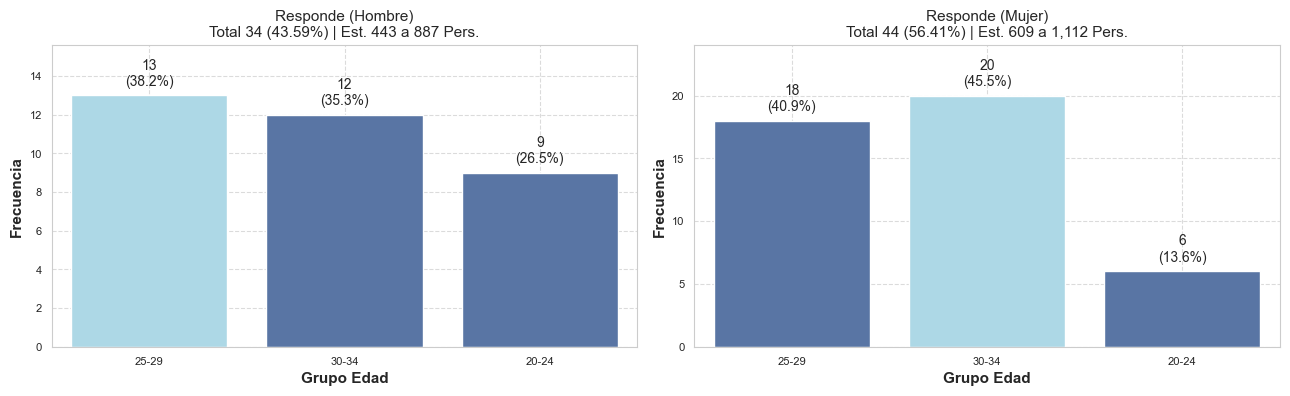

In [27]:
plot_hist_hue(summary, 'SEXO', 'AGE_DETAIL','Grupo Edad','Genero')

#### Visualización de la Distribución de Probabilidad

Esta función crea un histograma detallado que muestra cómo se distribuyen las respuestas a una pregunta específica de una encuesta. Resalta la probabilidad de cada respuesta, la media y la mediana, y el porcentaje de respuestas que caen dentro de dos desviaciones estándar de la media. Además, el histograma puede ser personalizado para mostrar etiquetas específicas para ciertas preguntas, lo que facilita la interpretación de los datos.


In [28]:
def plot_hist(chapter, question, name,bin=10,image_name=None):

    data = load_data(chapter)
    data.dropna(inplace=True, subset=[question], how='any')

    sns.set_style("whitegrid")
    sns.set_palette("deep")

    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Calcular los bins y las frecuencias
    counts, bins, _ = ax.hist(data[question], bins=bin, density=True, alpha=0)
    
    # Calcular la media y la desviación estándar
    media = data[question].mean()
    desv_est = data[question].std()
    
    # Calcular los límites para 2 desviaciones estándar
    lower_bound = media - 2 * desv_est
    upper_bound = media + 2 * desv_est
    
    # Encontrar los bins que caen dentro de 2 desviaciones estándar
    within_2std = (bins[:-1] >= lower_bound) & (bins[1:] <= upper_bound)
    
    # Calcular la probabilidad acumulada dentro de 2 desviaciones estándar
    prob_acum = np.sum(counts[within_2std] * np.diff(bins)[within_2std])
    
    # Crear el histograma
    hist = sns.histplot(data=data, x=question, bins=bins, stat='probability', 
                        multiple='stack', kde=True, ax=ax)
    
    for i, (count, bin_left, bin_right) in enumerate(zip(counts, bins[:-1], bins[1:])):
        if within_2std[i]:
            ax.axvspan(bin_left, bin_right, alpha=0.3, color='yellow')
    
    kde_x, kde_y = hist.lines[0].get_data()
    
    mediana = data[question].median()
    prob_mediana = np.interp(mediana, kde_x, kde_y)
    prob_media = np.interp(media, kde_x, kde_y)

    ax.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax.text(mediana, prob_mediana, f'({prob_mediana*100:.2f}%)', color='green', ha='left', va='bottom')

    ax.axvline(media, color='purple', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
    ax.text(media, prob_media, f'({prob_media*100:.2f}%)', color='purple', ha='right', va='bottom')

    total_datos = len(data)*100/2015
    ax.set_title(f'Distribución Probabilidad | Muestra ({total_datos:.2f}%)\n'
                f'Prob. Acum. (2σ): {prob_acum*100:.2f}%', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel(name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Probabilidad', fontsize=12, fontweight='bold')

    min_val = int(np.floor(data[question].min()))
    max_val = int(np.ceil(data[question].max()))
    

    tick_labels  = list(answers_mapping(chapter,question).values())
    
    ax.set_xticks(range(min_val, max_val + 1))
    ax.tick_params(axis='x', rotation=0)

    if question in ['NPCJP2', 'NPCJP6']:
        ax.set_xticklabels(tick_labels)
    
    ax.legend()

    plt.tight_layout()
    plt.show()

    if image_name is not None:sx
        path = './circleup/figures'
        plt.savefig(f'{path}/{image_name}.png')

#### Distribución de Satisfacción con la Vida

Este gráfico ilustra cómo se distribuyen las respuestas a la pregunta "¿Estás satisfecho con tu vida?" en una escala del 1 al 10. La mayoría de los encuestados (96.36%) se ubican dentro de dos desviaciones estándar de la media, indicando una alta concentración de respuestas en torno a los valores centrales. La mediana (9) y la media (8.47) son relativamente altas, sugiriendo un nivel general de satisfacción elevado en la muestra.


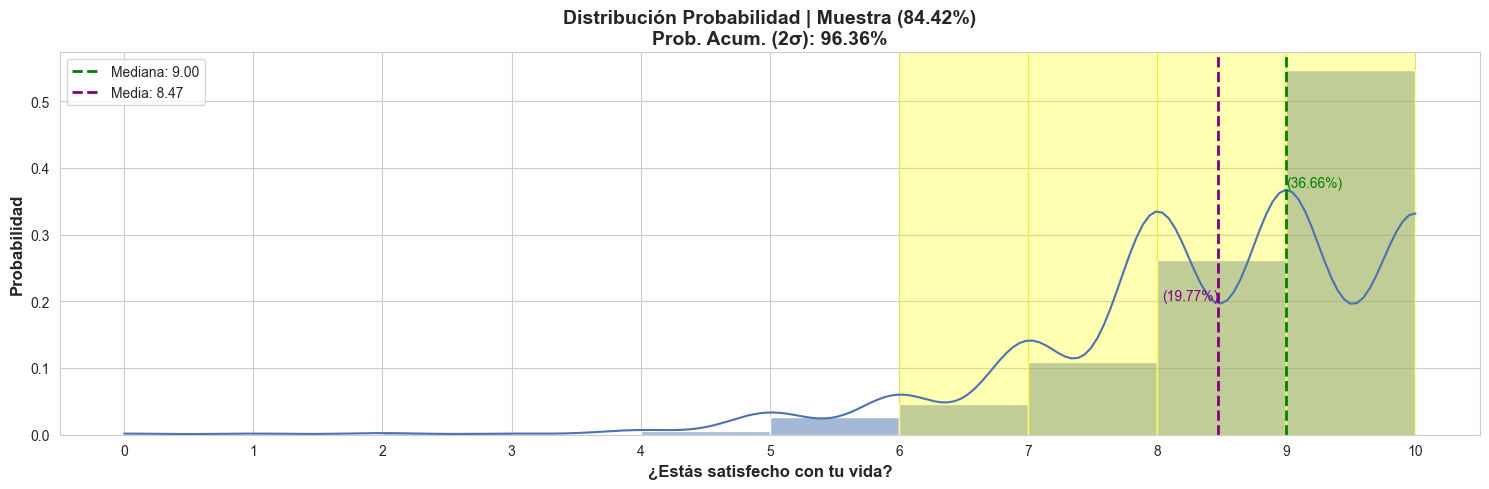

In [29]:
plot_hist('J','NPCJP9AA','¿Estás satisfecho con tu vida?')

Se presenta una visión general de las funciones utilizadas para analizar y visualizar datos de encuestas, incluyendo la distribución de edades por género y la satisfacción con la vida. Aunque no abarca todos los análisis realizados, demuestra el uso de histogramas, gráficos de densidad y estadísticas descriptivas para comprender patrones y tendencias en los datos. Estas herramientas son fundamentales para extraer información significativa y tomar decisiones basadas en evidencia a partir de los resultados de la encuesta.